In [ ]:
from getdist import MCSamples, plots
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from src.hmc import Hmc
from src.pdf import Banana, Gaussian, Donut, Lognormal, Gaussian1D, Chisq

names = [r'$x$',r'$y$']

  0%|          | 0/5200 [00:00<?, ?it/s]

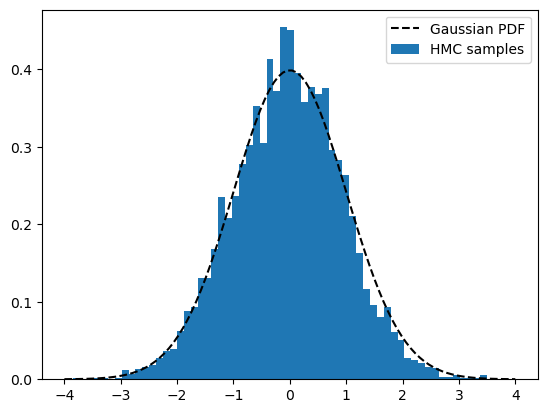

In [6]:
# Ex. Gaussian 1D
samples = Hmc(jnp.array([0.]), 5000, 0.5, 2, Gaussian1D, jnp.eye(1),200)
# ==== Plot expected vs. samps
x_vals = np.linspace(-4, 4, 100)
y_vals = np.array([Gaussian1D(jnp.array([x]), mu=0.0, sigma=1.0) for x in x_vals])/np.sqrt(2*np.pi)

plt.plot(x_vals, y_vals, label='Gaussian PDF',color='black',linestyle='dashed')
plt.hist(samples[:,0], density=True, label='HMC samples',bins=60)
plt.legend()
plt.show()


  0%|          | 0/5200 [00:00<?, ?it/s]

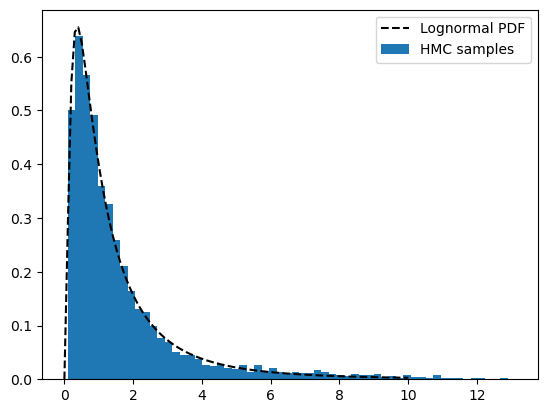

In [7]:
# Ex. Lognormal
samples = Hmc(jnp.array([1.]), 5000, 0.5, 2, Lognormal, jnp.eye(1),200)

# ==== Plot expected vs. samps
x_vals = np.linspace(0.001, 10, 100)
y_vals = np.array([Lognormal(jnp.array([x]), mu=0.0, sigma=1.0, shift=0.0) for x in x_vals])/np.sqrt(2*np.pi)

plt.plot(x_vals, y_vals, label='Lognormal PDF',color='black',linestyle='dashed')
plt.hist(samples[:,0], density=True, label='HMC samples',bins=60)
plt.legend()
plt.show()


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/5200 [00:00<?, ?it/s]

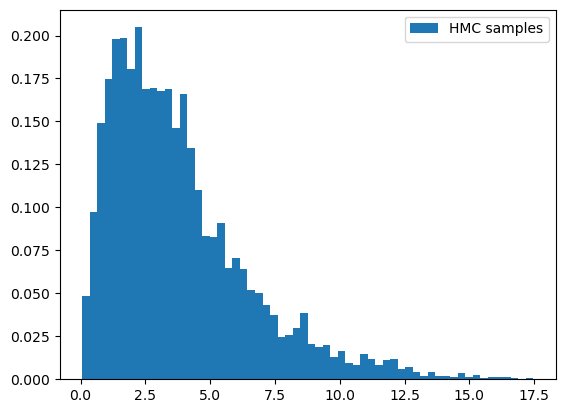

In [ ]:
# Ex. Chisq
samples = Hmc(jnp.array([2.]), 5000, 0.5, 2, Chisq, jnp.eye(1),200)
# ==== Plot 
plt.hist(samples[:,0], density=True, label='HMC samples',bins=60)
plt.legend()
plt.show()

  0%|          | 0/10800 [00:00<?, ?it/s]

Removed no burn in


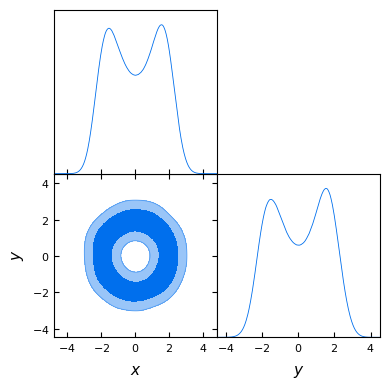

In [4]:
# Ex. Donut
samples = Hmc(jnp.array([2.0, 0.0]), 10000, 0.5, 2, Donut, jnp.eye(2),800)
samps = MCSamples(samples=samples, names=names)
g = plots.get_subplot_plotter()
g.triangle_plot([samps], filled=True, smooth_scale_1D=1., smooth_scale_2D=1.)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/5080 [00:00<?, ?it/s]

Removed no burn in
Removed no burn in


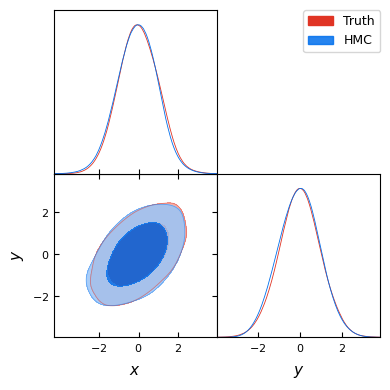

In [3]:
# Ex. Correlated Gaussian cov = [[1, 0.5], [0.5, 1]]
mass = jnp.array([[1, 0.5], [0.5, 1]])
hmc_samples = Hmc(jnp.array([0.0, 0.0]), 5000, 0.2, 2, Gaussian, mass,80)
hmc_samps = MCSamples(samples=hmc_samples, names=names,label="HMC")

# ==== Comparison with truth
true_samples = np.random.multivariate_normal(np.zeros(2),mass,10000)
true_samps = MCSamples(samples=true_samples, names=names,label="Truth")
# ====
g = plots.get_subplot_plotter()
g.triangle_plot([true_samps,hmc_samps], filled=True, smooth_scale_1D=1., smooth_scale_2D=1.)

  0%|          | 0/5800 [00:00<?, ?it/s]

Removed no burn in


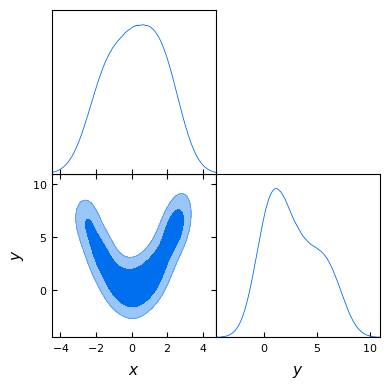

In [4]:
# Ex. Banana
samples = Hmc(jnp.array([0.0, 0.0]), 5000, 0.5, 2, Banana, jnp.eye(2),800)
samps = MCSamples(samples=samples, names=names)
g = plots.get_subplot_plotter()
g.triangle_plot([samps], filled=True, smooth_scale_1D=1., smooth_scale_2D=1.)
